In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from numpy.linalg import inv
from sklearn.model_selection import train_test_split

In [92]:
data = pd.read_csv("HousePrice.csv")
data.head(10)

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
5,70,2,True,True,False,North Program Organization,2.050000e+09,68333.33
6,87,2,True,True,True,Pardis,6.000000e+08,20000.00
7,59,1,True,True,True,Shahran,2.150000e+09,71666.67
8,54,2,True,True,False,Andisheh,4.930000e+08,16433.33
9,71,1,True,True,True,West Ferdows Boulevard,2.370000e+09,79000.00


In [93]:
df.describe()

,level_0,index,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,5.000000,5.00000,5.000000,5.000000,5.0,5.0,5.000000,5.000000e+00,5.000000e+00
mean,2.000000,1216.80000,511.000000,4.600000,1.0,1.0,0.400000,8.610000e+10,2.870000e+06
std,1.581139,586.47907,167.868997,0.547723,0.0,0.0,0.547723,5.397222e+09,1.799074e+05
min,0.000000,430.00000,350.000000,4.000000,1.0,1.0,0.000000,8.050000e+10,2.683333e+06
25%,1.000000,816.00000,400.000000,4.000000,1.0,1.0,0.000000,8.160000e+10,2.720000e+06
50%,2.000000,1329.00000,420.000000,5.000000,1.0,1.0,0.000000,8.500000e+10,2.833333e+06
75%,3.000000,1703.00000,680.000000,5.000000,1.0,1.0,1.000000,9.100000e+10,3.033333e+06
max,4.000000,1806.00000,705.000000,5.000000,1.0,1.0,1.000000,9.240000e+10,3.080000e+06


In [94]:
# Preprocessing

data['Parking'].replace([True ,False],[1,0], inplace=True)
data['Warehouse'].replace([True , False] , [1,0] , inplace=True)
data['Elevator'].replace([True , False] ,[1,0] , inplace = True)
data.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


In [95]:
data[data.duplicated()]
data.drop_duplicates(inplace=True)
data[data.duplicated()]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)


In [96]:
df =data.sort_values(by=["Price"], ascending=False).reset_index()[:5].reset_index()
df

,level_0,index,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,0,1703,420,4,1,1,1,Zaferanieh,9.240000e+10,3080000.00
1,1,1806,705,5,1,1,0,Abazar,9.100000e+10,3033333.33
2,2,430,400,5,1,1,0,Lavasan,8.500000e+10,2833333.33
3,3,816,680,5,1,1,0,Ekhtiarieh,8.160000e+10,2720000.00
4,4,1329,350,4,1,1,1,Niavaran,8.050000e+10,2683333.33


In [97]:
df.describe()

,level_0,index,Area,Room,Parking,Warehouse,Elevator,Price,Price(USD)
count,5.000000,5.00000,5.000000,5.000000,5.0,5.0,5.000000,5.000000e+00,5.000000e+00
mean,2.000000,1216.80000,511.000000,4.600000,1.0,1.0,0.400000,8.610000e+10,2.870000e+06
std,1.581139,586.47907,167.868997,0.547723,0.0,0.0,0.547723,5.397222e+09,1.799074e+05
min,0.000000,430.00000,350.000000,4.000000,1.0,1.0,0.000000,8.050000e+10,2.683333e+06
25%,1.000000,816.00000,400.000000,4.000000,1.0,1.0,0.000000,8.160000e+10,2.720000e+06
50%,2.000000,1329.00000,420.000000,5.000000,1.0,1.0,0.000000,8.500000e+10,2.833333e+06
75%,3.000000,1703.00000,680.000000,5.000000,1.0,1.0,1.000000,9.100000e+10,3.033333e+06
max,4.000000,1806.00000,705.000000,5.000000,1.0,1.0,1.000000,9.240000e+10,3.080000e+06


In [98]:
data.shape

(3265, 8)

In [99]:
data.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

In [100]:
data.dropna(inplace=True)
data.shape

(3242, 8)

In [101]:
df.loc[: , "Price"] = df["Price"].map('{:,.0f}'.format) 
df

,level_0,index,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,0,1703,420,4,1,1,1,Zaferanieh,"92,400,000,000",3080000.00
1,1,1806,705,5,1,1,0,Abazar,"91,000,000,000",3033333.33
2,2,430,400,5,1,1,0,Lavasan,"85,000,000,000",2833333.33
3,3,816,680,5,1,1,0,Ekhtiarieh,"81,600,000,000",2720000.00
4,4,1329,350,4,1,1,1,Niavaran,"80,500,000,000",2683333.33


In [102]:
df["Price"] = [float(str(i).replace(",",""))for i in df["Price"]]

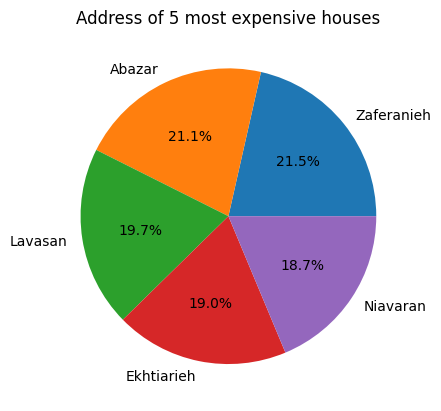

In [103]:
plt.pie(df['Price'] , labels=df['Address'] , autopct='%1.1f%%')
plt.title("Address of 5 most expensive houses")
plt.show()

In [104]:
fig = px.bar(df ,x='Address' , y='Price',
            title='Address of 5 most expensive houses',
            labels= {'Price':'Price' , 'Address':'Address'},
            hover_data={'Area':True , 'Price': ':.2e'},
            text='Area'
             )


fig.update_layout(xaxis_title='Address',
                  yaxis_title='Price',
                  yaxis_type='log',
                  uniformtext_minsize=8,
                  )


fig.show()